In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("credit_card_default.csv")
df.head()

,Unnamed: 0,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30000 non-null  int64  
 1   limit_bal                   30000 non-null  int64  
 2   sex                         29850 non-null  object 
 3   education                   29850 non-null  object 
 4   marriage                    29850 non-null  object 
 5   age                         29850 non-null  float64
 6   payment_status_sep          30000 non-null  object 
 7   payment_status_aug          30000 non-null  object 
 8   payment_status_jul          30000 non-null  object 
 9   payment_status_jun          30000 non-null  object 
 10  payment_status_may          30000 non-null  object 
 11  payment_status_apr          30000 non-null  object 
 12  bill_statement_sep          30000 non-null  int64  
 13  bill_statement_aug          300

Unnamed: 0                      0
limit_bal                       0
sex                           150
education                     150
marriage                      150
age                           150
payment_status_sep              0
payment_status_aug              0
payment_status_jul              0
payment_status_jun              0
payment_status_may              0
payment_status_apr              0
bill_statement_sep              0
bill_statement_aug              0
bill_statement_jul              0
bill_statement_jun              0
bill_statement_may              0
bill_statement_apr              0
previous_payment_sep            0
previous_payment_aug            0
previous_payment_jul            0
previous_payment_jun            0
previous_payment_may            0
previous_payment_apr            0
default_payment_next_month      0
dtype: int64

In [4]:
df.columns = df.columns.str.lower()

In [6]:
# Average bill vs credit limit
bill_cols = [col for col in df.columns if 'bill_amt' in col]

df['avg_bill_amount'] = df[bill_cols].mean(axis=1)
df['credit_utilization'] = df['avg_bill_amount'] / df['limit_bal']

In [7]:
# High utilization flag
df['high_utilization_flag'] = np.where(
    df['credit_utilization'] > 0.7, 1, 0
)


In [8]:
# Average payment made
pay_amt_cols = [col for col in df.columns if 'pay_amt' in col]

df['avg_payment_made'] = df[pay_amt_cols].mean(axis=1)


In [9]:
# Low repayment flag
df['low_repayment_flag'] = np.where(
    df['avg_payment_made'] < (0.3 * df['avg_bill_amount']), 1, 0
)

In [12]:
df['bill_pressure_flag'] = np.where(
    df['avg_bill_amount'] > df['limit_bal'], 1, 0
)

# Risk Signal Scoring
df['risk_score'] = (
    df['bill_pressure_flag'] +
    df['high_utilization_flag'] +
    df['low_repayment_flag']
)

In [13]:
# Risk Segmentation
df['risk_segment'] = pd.cut(
    df['risk_score'],
    bins=[-1, 1, 2, 3],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)


In [16]:
# Risk vs Actual Default Validation
df.groupby('risk_segment')['default_payment_next_month'].mean()

C:\Users\Pratham\AppData\Local\Temp\ipykernel_10264\3952705968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('risk_segment')['default_payment_next_month'].mean()


risk_segment
Low Risk       0.2212
Medium Risk       NaN
High Risk         NaN
Name: default_payment_next_month, dtype: float64

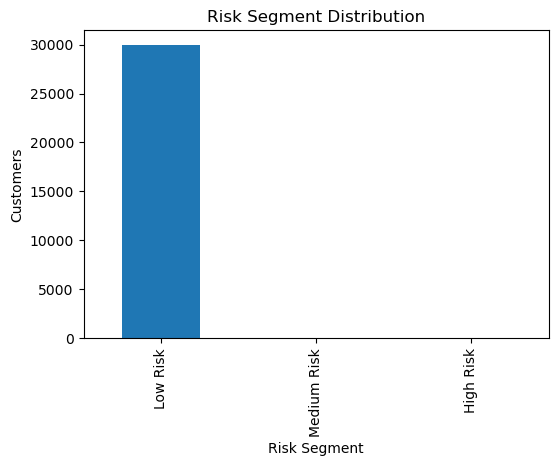

In [17]:
# Risk Segment Distribution
plt.figure(figsize=(6,4))
df['risk_segment'].value_counts().plot(kind='bar')
plt.title("Risk Segment Distribution")
plt.xlabel("Risk Segment")
plt.ylabel("Customers")
plt.show()

C:\Users\Pratham\AppData\Local\Temp\ipykernel_10264\2233298409.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('risk_segment')['credit_utilization'].mean().plot(kind='bar')


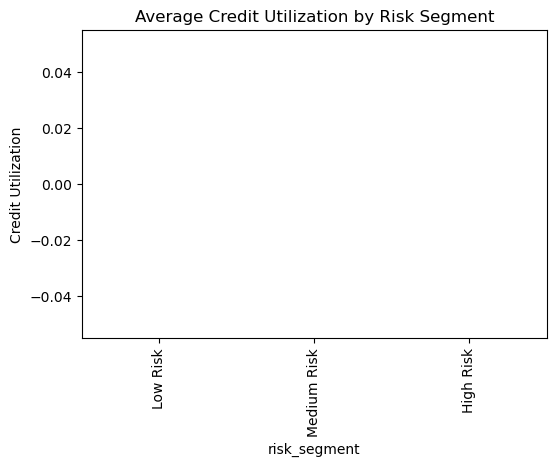

In [19]:
# Credit Utilization vs Risk 
plt.figure(figsize=(6,4))
df.groupby('risk_segment')['credit_utilization'].mean().plot(kind='bar')
plt.title("Average Credit Utilization by Risk Segment")
plt.ylabel("Credit Utilization")
plt.show()
